### Import libraries

In [3]:
import pandas as pd
import seaborn as sns

### Import data

In [4]:
df = pd.read_csv('./dataset/cogset_exp.csv')
df.head()

,Species,Subject,Date,Time,Phase,Block,Trial,ConfigID,Correct1,Correct2,...,Response3,RT1,RT2,RT3,ACC1,ACC2,ACC3,Score,Score2,Condition
0,Human,EZ_06,2017-09-26,13:25:22,Exp,1,1,7,TopRight,TopLeft,...,BottomRight,1093,886.0,1530.0,1,1.0,1.0,1,0,BASE
1,Human,EZ_06,2017-09-26,13:25:28,Exp,1,2,16,BottomLeft,BottomRight,...,TopLeft,1107,778.0,963.0,1,1.0,1.0,1,0,BASE
2,Human,EZ_06,2017-09-26,13:25:35,Exp,1,3,5,TopLeft,BottomRight,...,BottomLeft,1260,951.0,1253.0,1,1.0,1.0,1,0,BASE
3,Human,EZ_06,2017-09-26,13:25:42,Exp,1,4,0,TopLeft,TopRight,...,BottomLeft,1069,954.0,1364.0,1,1.0,1.0,1,0,PROBE
4,Human,EZ_06,2017-09-26,13:25:47,Exp,1,5,2,TopLeft,BottomLeft,...,TopRight,901,864.0,813.0,1,1.0,1.0,1,0,BASE


### Count each species

In [5]:
set(list(df.loc[:,'Species'].values))

{'Capuchin', 'Human', 'Rhesus'}

In [6]:
num_of_human = df.loc[df['Species'] == 'Human'].count()[0]
num_of_capuchins = df.loc[df['Species'] == 'Capuchin'].count()[0]
num_of_rhesus = df.loc[df['Species'] == 'Rhesus'].count()[0]

num_of_human, num_of_capuchins, num_of_rhesus

(10752, 3840, 1344)

<AxesSubplot:xlabel='Species', ylabel='count'>

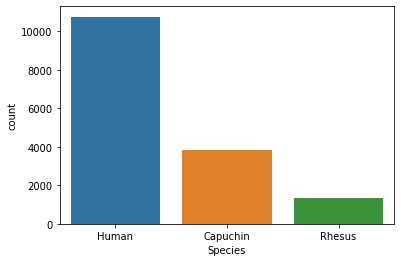

In [7]:
sns.countplot(x='Species', data=df)

### Direct Strategy used

In [8]:
### Select probe trials only
probe_df = df.loc[df['Condition'] == 'PROBE']
probe_df = probe_df.reset_index(drop=True)

In [9]:
### Initialize direct strategy used for each id
species_id_list = list(probe_df['Subject'])
zeros = [0 for i in range(len(species_id_list))]
d_species = dict(zip(species_id_list,zeros))

In [10]:
### count the number the direct strategy used
for i in range(len(probe_df)):
    subject_id = probe_df.loc[i, 'Subject']
    if probe_df.loc[i, 'Score2'] == 2:
        d_species[subject_id] += 1

In [11]:
### count how many trials each species have done
species_ids = list(set(list(df['Subject'])))

probe_trials = {}
for s_ids in species_ids:
    probe_trials[s_ids] = probe_df.loc[probe_df['Subject'] == s_ids].count()[0]

In [12]:
for key in d_species:
    d_species[key] /= probe_trials[key]
    d_species[key] *= 100

In [13]:
human_df = probe_df.loc[probe_df['Species'] == 'Human']
human_subjects = list(set(list(human_df['Subject'])))

capuchin_df = probe_df.loc[probe_df['Species'] == 'Capuchin']
capuchin_subjects = list(set(list(capuchin_df['Subject'])))

rhesus_df = probe_df.loc[probe_df['Species'] == 'Rhesus']
rhesus_subjects = list(set(list(rhesus_df['Subject'])))

In [14]:
human_ds, capuchin_ds, rhesus_ds = [], [], []

for key in d_species:
    if key in human_subjects:
        human_ds.append(d_species[key])
    elif key in capuchin_subjects:
        capuchin_ds.append(d_species[key])
    else:
        rhesus_ds.append(d_species[key])

human_ds, capuchin_ds, rhesus_ds

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  11.458333333333332,
  92.70833333333334,
  0.0,
  41.66666666666667,
  0.0,
  50.0,
  0.0,
  0.0,
  72.91666666666666,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  66.66666666666666,
  90.625,
  0.0,
  12.5,
  0.0,
  0.0,
  56.25,
  43.75,
  61.458333333333336,
  17.708333333333336,
  75.0,
  92.70833333333334,
  57.291666666666664,
  0.0,
  0.0,
  0.0,
  0.0,
  53.125,
  0.0,
  0.0,
  0.0,
  40.625,
  0.0,
  56.25,
  0.0,
  6.25,
  0.0,
  90.625,
  9.375,
  76.04166666666666,
  52.083333333333336,
  0.0],
 [97.91666666666666,
  89.58333333333334,
  93.75,
  59.375,
  91.66666666666666,
  100.0,
  96.875,
  98.95833333333334,
  65.625,
  85.41666666666666,
  93.75,
  88.54166666666666,
  98.95833333333334,
  91.66666666666666,
  93.75,
  100.0,
  96.875,
  93.75,
  100.0,
  100.0],
 [97.91666666666666,
  88.54166666666666,
  55.208333333333336,
  8.333333333333332,
  100.0,
  100.0,
  92.70833333333334])

In [31]:
### human
human_list = []
for ds in human_ds:
    human_list.append(ds)
    
### capuchin
capuchin_list = []
for ds in capuchin_ds:
    capuchin_list.append(ds)
    
### rhesus 
rhesus_list = []
for ds in rhesus_ds:
    rhesus_list.append(ds)

In [34]:
direct_df = pd.DataFrame(columns=['species', 'ds'])

### human
for i in range(len(human_list)):
    direct_df.loc[i] = ['human'] + [human_list[i]]
    
### capuchin
for i in range(len(capuchin_list)):
    direct_df.loc[i] = ['capuchin'] + [capuchin_list[i]]
    
### rhesus
for i in range(len(rhesus_list)):
    direct_df.loc[i] = ['rhesus'] + [rhesus_list[i]]

In [35]:
direct_df.head()

,species,ds
0,rhesus,97.916667
1,rhesus,88.541667
2,rhesus,55.208333
3,rhesus,8.333333
4,rhesus,100.000000


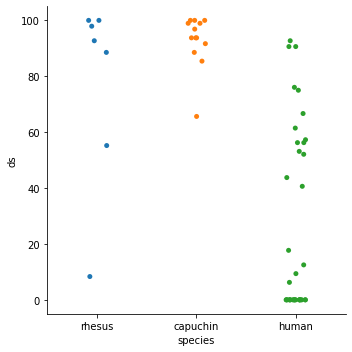

In [36]:
sns.catplot(x='species', y='ds', data=direct_df)

In [44]:
### how many people used 0 direct strategy?
human_df = direct_df.loc[direct_df['species'] == 'human']
human_df.loc[human_df['ds'] == 0].count()[0]

18

## Switch Strategy

In [87]:
### Select probe trials only
probe_df = df.loc[df['Condition'] == 'PROBE']
probe_df = probe_df.reset_index(drop=True)

In [88]:
### Initialize switch strategy used for each id
species_id_list = list(probe_df['Subject'])
zeros = [0 for i in range(len(species_id_list))]
d_species = dict(zip(species_id_list,zeros))

In [90]:
### count the number the direct strategy used
for i in range(len(probe_df)):
    subject_id = probe_df.loc[i, 'Subject']
    if probe_df.loc[i, 'Score2'] == 1:
        d_species[subject_id] += 1

In [92]:
### count how many trials each species have done
species_ids = list(set(list(df['Subject'])))

probe_trials = {}
for s_ids in species_ids:
    probe_trials[s_ids] = probe_df.loc[probe_df['Subject'] == s_ids].count()[0]

In [97]:
for key in d_species:
    d_species[key] /= probe_trials[key]
    d_species[key] *= 100

In [99]:
human_df = probe_df.loc[probe_df['Species'] == 'Human']
human_subjects = list(set(list(human_df['Subject'])))

capuchin_df = probe_df.loc[probe_df['Species'] == 'Capuchin']
capuchin_subjects = list(set(list(capuchin_df['Subject'])))

rhesus_df = probe_df.loc[probe_df['Species'] == 'Rhesus']
rhesus_subjects = list(set(list(rhesus_df['Subject'])))

In [100]:
human_ds, capuchin_ds, rhesus_ds = [], [], []

for key in d_species:
    if key in human_subjects:
        human_ds.append(d_species[key])
    elif key in capuchin_subjects:
        capuchin_ds.append(d_species[key])
    else:
        rhesus_ds.append(d_species[key])

human_ds, capuchin_ds, rhesus_ds

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0416666666666665,
  0.0,
  39.58333333333333,
  1.0416666666666665,
  0.0,
  0.0,
  0.0,
  2.083333333333333,
  1.0416666666666665,
  1.0416666666666665,
  3.125,
  0.0,
  1.0416666666666665,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.125,
  1.0416666666666665,
  23.958333333333336,
  13.541666666666666,
  0.0,
  65.625,
  1.0416666666666665,
  20.833333333333336,
  25.0,
  3.125,
  0.0,
  0.0,
  6.25,
  1.0416666666666665,
  0.0,
  0.0,
  0.0,
  5.208333333333334,
  1.0416666666666665,
  1.0416666666666665,
  1.0416666666666665,
  9.375,
  0.0,
  1.0416666666666665,
  0.0,
  3.125,
  0.0,
  2.083333333333333,
  1.0416666666666665,
  1.0416666666666665,
  1.0416666666666665,
  2.083333333333333],
 [2.083333333333333,
  6.25,
  3.125,
  23.958333333333336,
  6.25,
  0.0,
  0.0,
  0.0,
  28.125,
  4.166666666666666,
  1.0416666666666665,
  2.083333333333333,
  0.0,
  7.291666666666667,
  5.208333333333334,
  0.0,
  0.0,
  5.208333333333334,
  0.0

In [101]:
### human
human_list = []
for ds in human_ds:
    human_list.append(ds)
    
### capuchin
capuchin_list = []
for ds in capuchin_ds:
    capuchin_list.append(ds)
    
### rhesus 
rhesus_list = []
for ds in rhesus_ds:
    rhesus_list.append(ds)

In [102]:
switch_df = pd.DataFrame(columns=['species', 'ds'])

### human
for i in range(len(human_list)):
    switch_df.loc[i] = ['human'] + [human_list[i]]
    
### capuchin
for i in range(len(capuchin_list)):
    switch_df.loc[i] = ['capuchin'] + [capuchin_list[i]]
    
### rhesus
for i in range(len(rhesus_list)):
    switch_df.loc[i] = ['rhesus'] + [rhesus_list[i]]

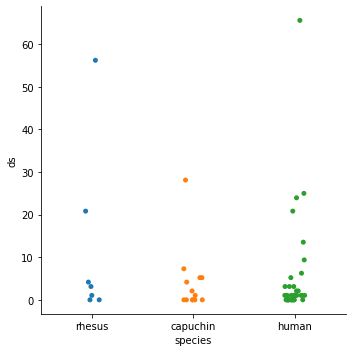

In [103]:
sns.catplot(x='species', y='ds', data=switch_df)

## Accuracy

**BASE**

In [105]:
base_df = df.loc[df['Condition'] == 'BASE']
base_df.head()

,Species,Subject,Date,Time,Phase,Block,Trial,ConfigID,Correct1,Correct2,...,Response3,RT1,RT2,RT3,ACC1,ACC2,ACC3,Score,Score2,Condition
0,Human,EZ_06,2017-09-26,13:25:22,Exp,1,1,7,TopRight,TopLeft,...,BottomRight,1093,886.0,1530.0,1,1.0,1.0,1,0,BASE
1,Human,EZ_06,2017-09-26,13:25:28,Exp,1,2,16,BottomLeft,BottomRight,...,TopLeft,1107,778.0,963.0,1,1.0,1.0,1,0,BASE
2,Human,EZ_06,2017-09-26,13:25:35,Exp,1,3,5,TopLeft,BottomRight,...,BottomLeft,1260,951.0,1253.0,1,1.0,1.0,1,0,BASE
4,Human,EZ_06,2017-09-26,13:25:47,Exp,1,5,2,TopLeft,BottomLeft,...,TopRight,901,864.0,813.0,1,1.0,1.0,1,0,BASE
5,Human,EZ_06,2017-09-26,13:25:53,Exp,1,6,13,BottomLeft,TopLeft,...,BottomRight,1089,746.0,1189.0,1,1.0,1.0,1,0,BASE


In [112]:
human_base_df = base_df.loc[base_df['Species'] == 'Human']
capuchin_base_df = base_df.loc[base_df['Species'] == 'Capuchin']
rhesus_base_df = base_df.loc[base_df['Species'] == 'Rhesus']

### number of incorrect trials
human_incorrect = human_base_df.loc[human_base_df['Score'] == 0].count()[0]
capuchin_incorrect = capuchin_base_df.loc[capuchin_base_df['Score'] == 0].count()[0]
rhesus_incorrect = rhesus_base_df.loc[rhesus_base_df['Score'] == 0].count()[0]

### total species
total_human = human_base_df.count()[0]
total_capuchin = capuchin_base_df.count()[0]
total_rhesus = rhesus_base_df.count()[0]

### accuracy
human_acc = (1 - (human_incorrect/total_human)) * 100
capuchin_acc = (1 - (capuchin_incorrect/total_capuchin)) * 100
rhesus_acc = (1 - (rhesus_incorrect/total_rhesus)) * 100

human_acc, capuchin_acc, rhesus_acc

(95.25669642857143, 74.27083333333333, 86.60714285714286)

**PROBE**

In [111]:
probe_df = df.loc[df['Condition'] == 'PROBE']
probe_df.head()

,Species,Subject,Date,Time,Phase,Block,Trial,ConfigID,Correct1,Correct2,...,Response3,RT1,RT2,RT3,ACC1,ACC2,ACC3,Score,Score2,Condition
3,Human,EZ_06,2017-09-26,13:25:42,Exp,1,4,0,TopLeft,TopRight,...,BottomLeft,1069,954.0,1364.0,1,1.0,1.0,1,0,PROBE
8,Human,EZ_06,2017-09-26,13:26:10,Exp,1,9,21,BottomRight,TopRight,...,BottomLeft,847,727.0,1207.0,1,1.0,1.0,1,0,PROBE
9,Human,EZ_06,2017-09-26,13:26:16,Exp,1,10,19,BottomRight,TopLeft,...,BottomLeft,1067,882.0,1188.0,1,1.0,1.0,1,0,PROBE
11,Human,EZ_06,2017-09-26,13:26:28,Exp,1,12,15,BottomLeft,TopRight,...,BottomRight,914,759.0,1122.0,1,1.0,1.0,1,0,PROBE
12,Human,EZ_06,2017-09-26,13:26:34,Exp,1,13,11,TopRight,BottomRight,...,BottomLeft,916,781.0,1344.0,1,1.0,1.0,1,0,PROBE


In [113]:
human_probe_df = probe_df.loc[probe_df['Species'] == 'Human']
capuchin_probe_df = probe_df.loc[probe_df['Species'] == 'Capuchin']
rhesus_probe_df = probe_df.loc[probe_df['Species'] == 'Rhesus']

### number of incorrect trials
human_probe_incorrect = human_probe_df.loc[human_probe_df['Score'] == 0].count()[0]
capuchin_probe_incorrect = capuchin_probe_df.loc[capuchin_probe_df['Score'] == 0].count()[0]
rhesus_probe_incorrect = rhesus_probe_df.loc[rhesus_probe_df['Score'] == 0].count()[0]

### total species
total_probe_human = human_probe_df.count()[0]
total_probe_capuchin = capuchin_probe_df.count()[0]
total_probe_rhesus = rhesus_probe_df.count()[0]

### accuracy
human_probe_acc = (1 - (human_probe_incorrect/total_probe_human)) * 100
capuchin_probe_acc = (1 - (capuchin_probe_incorrect/total_probe_capuchin)) * 100
rhesus_probe_acc = (1 - (rhesus_probe_incorrect/total_probe_rhesus)) * 100

human_probe_acc, capuchin_probe_acc, rhesus_probe_acc

(98.046875, 97.1875, 96.875)

In [115]:
accuracy_df = pd.DataFrame(columns=['Condition', 'Species', 'Accuracy'])

### BASE
accuracy_df.loc[0] = ['BASE'] + ['human'] + [human_acc]
accuracy_df.loc[1] = ['BASE'] + ['capuchin'] + [capuchin_acc]
accuracy_df.loc[2] = ['BASE'] + ['rhesus'] + [rhesus_acc]

### PROBE
accuracy_df.loc[3] = ['PROBE'] + ['human'] + [human_probe_acc]
accuracy_df.loc[4] = ['PROBE'] + ['capuchin'] + [capuchin_probe_acc]
accuracy_df.loc[5] = ['PROBE'] + ['rhesus'] + [rhesus_probe_acc]

accuracy_df

,Condition,Species,Accuracy
0,BASE,human,95.256696
1,BASE,capuchin,74.270833
2,BASE,rhesus,86.607143
3,PROBE,human,98.046875
4,PROBE,capuchin,97.187500
5,PROBE,rhesus,96.875000


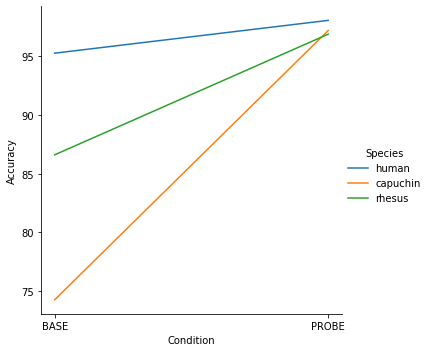

In [127]:
sns.relplot(x='Condition', y='Accuracy', data=accuracy_df, kind='line', hue='Species', markers=["o", "o", "o"])